<a href="https://colab.research.google.com/github/NidhiKothari/Python/blob/master/Assignment_02NK_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
Perform a statistical analysis and some regression techniques to explore the dataset.
You have two target variables (depending on the regression you are going to do):
•	FlagAccident: binary flag to show whether an accident has happened or not
•	Countts: the count of accidents that happened
You also have a lot of geographic and weather-related data to help explain why you see different amounts of accidents on roads (GRID_ID) within Connecticut. Two major storms (Storm A and B) where there were many accidents have been provided two you.


In [0]:
#!pip install scipy==1.2 
import pandas as pd
import sklearn 
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats 
import math
sb.set(rc={'figure.figsize':(5,5)})
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as ap

## Q1: Exploratory Data Analysis


### Show descriptive statistics for the numeric variables by storm. (10 points)

In [2]:
data=pd.read_csv('https://drive.google.com/uc?export=download&id=1ohf9tuKSMK0IAQR63xLT-Y8W9w3u6wiA',header=0,encoding='cp1252')
data.shape #(5702, 28)
data.head()
data1=data.dropna(how='all')
data_2=data1.dropna(how='any')

print(data.shape,data1.shape,data_2.shape)#This analysis shows that there are no null values in the dataset. However, doesn't imply anyother data inconsistencies.
#To understand the data and find any anamolies, descriptive analysis would prove to be helpful.
data.describe()
data.groupby(['SimStartDate']).describe()# Descriptive statistics for the nummeric variables by storm

(5702, 28) (5702, 28) (5702, 28)


GRID_ID                                   ... CountAccident                   
               count         mean          std    min  ...           25%  50%   75%     max
SimStartDate                                           ...                                 
StormA        2851.0  4268.025605  1233.431342  867.0  ...           1.0  9.0  49.0  4761.0
StormB        2851.0  4268.025605  1233.431342  867.0  ...           1.0  4.0  36.0  6241.0

[2 rows x 208 columns]

### Show three different, interesting plots; give each a meaningful caption that describes what you see. 

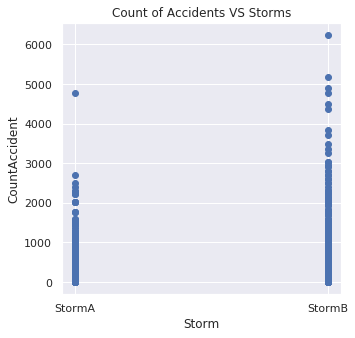

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Poisson'),
 Text(0.5, 1.0, 'Histogram of Count of Accidents')]

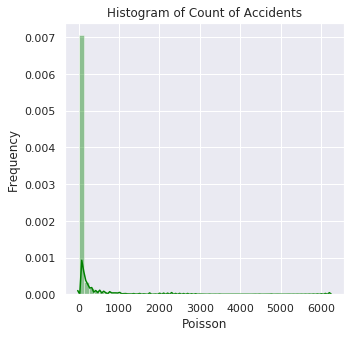

In [3]:
##PLot 1 - There is a good overlapping range between the scatter plots of Storm A and Storm B . As per us it is better to see the boxplots for these cases because , we believe if a model is built to predict type of model, the model might not have high accuracy.
accident_data=data[data['FlagAccident']==1]
accident_data['SimStartDate'].value_counts()
plt.scatter(data['SimStartDate'],data['CountAccident'])
plt.title("Count of Accidents VS Storms")
plt.xlabel('Storm')
plt.ylabel("CountAccident")
plt.show()

ax = sb.distplot(data['CountAccident'],
                  kde=True,
                  color='green')
ax.set(xlabel='Poisson', ylabel='Frequency',title='Histogram of Count of Accidents')

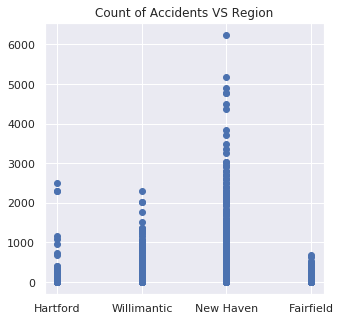

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Binonmial'),
 Text(0.5, 1.0, 'Histogram of Flag of Accidents')]

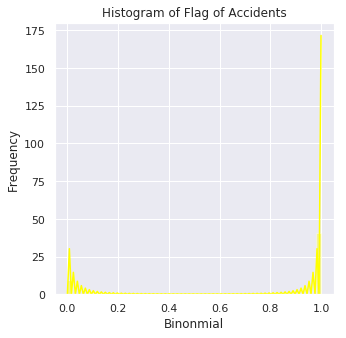

In [4]:
#PLot 2 - Shows that maximun number of accidents occur in New Haven.

plt.scatter(data['Region'],data['CountAccident'])
plt.title("Count of Accidents VS Region")
plt.show()

ax1 = sb.distplot(data['FlagAccident'],
                  kde=True,
                  color='Yellow')
ax1.set(xlabel='Binonmial', ylabel='Frequency',title='Histogram of Flag of Accidents')




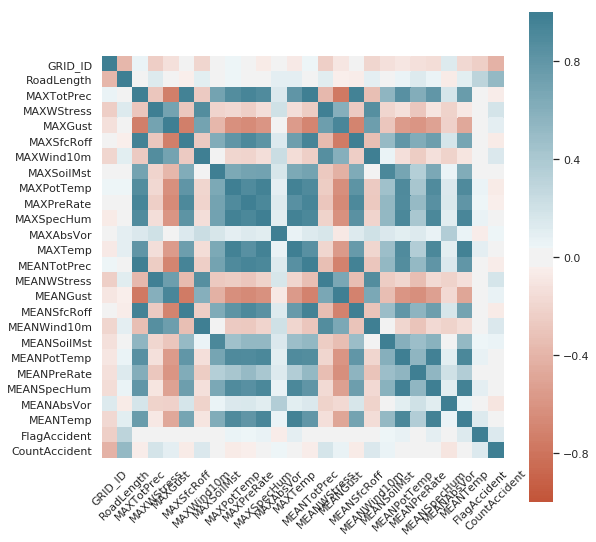

In [5]:
#PLot 3 - The plot shows many dark green and dark red boxes. Thus, it shows that many variables are correlated to each other and should be removed before prediction to avoid redundancy .
sb.set(rc={'figure.figsize':(9,9)})

corr = data.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,linewidths =0,)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='center'
);
sb.set(rc={'figure.figsize':(7,7)})


## Q2: Hypothesis Testing 

### Assumptions made


1.   The data is normally distributied based on the central limit theoram.Since the sample size is large enough (2523 rows for fairfield and hartford alone) we can consider means of the sample follows a normal distribution.




### Proportion test:

### CLAIM: On average, towns in Fairfield County have more accidents than Hartford .

Hypothesis Test-

H0 - Average number of accidents in Fairfield county is less than or equal to that in Hartford

H1- Average number of Accidents in Fairfield County more than that in Hartford


A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same

In [6]:

df=data.groupby(['Region']).describe()
df

GRID_ID                                    ... CountAccident                     
              count         mean          std     min  ...           25%   50%    75%     max
Region                                                 ...                                   
Fairfield    1474.0  4701.605156   952.095914  2755.0  ...           1.0   4.0   16.0   676.0
Hartford     1048.0  5469.923664   480.133627  4239.0  ...           1.0   4.0   16.0  2500.0
New Haven     914.0  2935.794311  1132.234810   867.0  ...           9.0  64.0  361.0  6241.0
Willimantic  2266.0  3967.484554  1009.183188  2163.0  ...           1.0   9.0   36.0  2304.0

[4 rows x 208 columns]

In [0]:
county_data=data.groupby(['Region']).mean()
county_accident_mean=county_data['FlagAccident']
county_accident_mean
avg_fairfield=county_accident_mean['Fairfield']
avg_hartford=county_accident_mean['Hartford']
#print(county_accident_mean,avg_fairfield,avg_hartford)
fairfield=data[(data['Region']=='Fairfield')]
hartford=data[(data['Region']=='Hartford')]

In [8]:


result=stats.ttest_ind(hartford['FlagAccident'],fairfield['FlagAccident'],equal_var=False) #As sd is same

result
#Since it is 1-tailed test we need the real p-value is 1-p/2
realp=1-result.pvalue/2
result
realp # as p-value is greater than 0.05, we fail to reject null hypothesis.There is not enough evidence to prove that the average number of accidents in fairlfield county is more than in hartford.


0.586299522711885

### Claim	- On average, do towns in Fairfield County have more accidents than Hartford 
Hypothesis Test-

H0 - Average number of accidents in Fairfield county is less than or equal to that in Hartford

H1- Average number of Accidents in Fairfield County more than that in Hartford


A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same

In [9]:

result2=stats.ttest_ind(hartford['CountAccident'],fairfield['CountAccident']) #as sd is different

result2
#Since it is 1-tailed test we need the real p-value is 1-p/2
realp2=1-result2.pvalue/2

realp2 # as p-value is greater than 0.05, we fail to reject null hypothesis.There is not enough evidence to prove that the average number of accidents in fairlfield county is more than in hartford.


0.9711972629943908

## Q3: Checking out the response variable 

### Visual test 

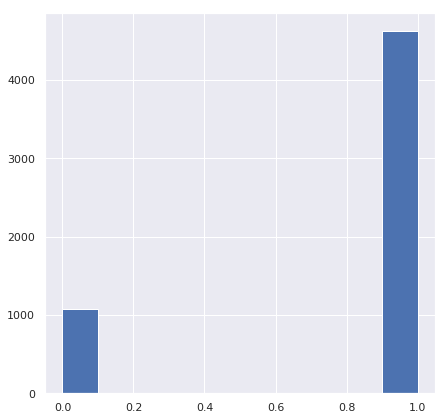

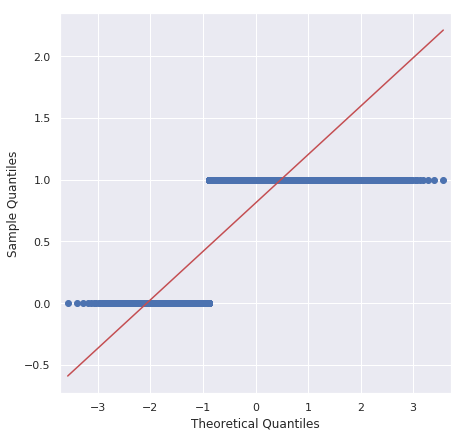

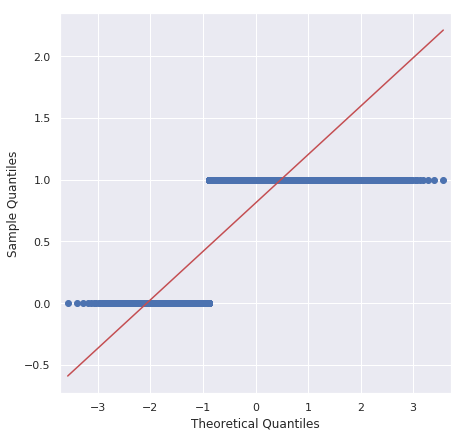

In [10]:
#We have 2 response variables in this scenerio. FlagAccident and CountAccident. If we see the flagaccidebt it is a categorical variable with only 2 values 0 and 1. Normal distribution doesn't make any sense in this case. 
plt.hist(data["FlagAccident"]) #Histogram doesn't reveal any normality
plt.show()


qqplot(data["FlagAccident"],line='s')#QQ plot showing the scatter plot of points in a parrallel line, not at all closely fitting the expected diagonal pattern for a sample to form a Gaussian distribution.
#Conclusion - Visiually this is not a normal distribution

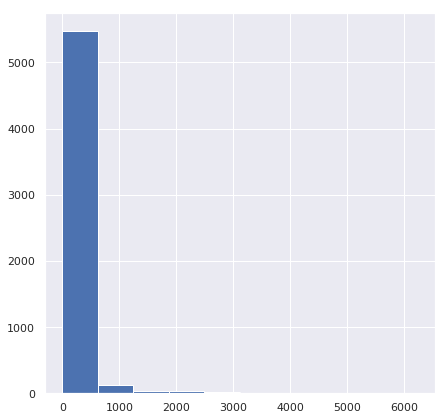

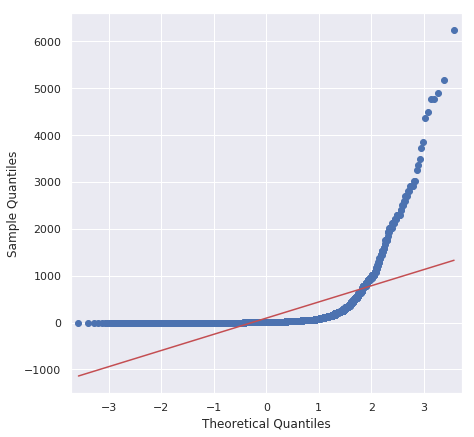

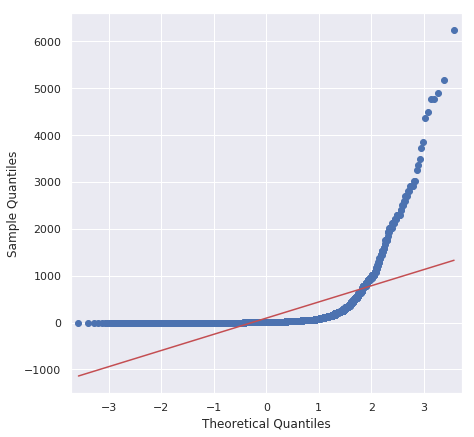

In [11]:
#FOR CountAccident. 
plt.hist(data["CountAccident"]) #Histogram doesn't reveal any normality
plt.show()

qqplot(data["CountAccident"],line='s')#QQ plot showing the scatter plot of points in a form which definetly doesn't look like a straight line, not at all closely fitting the expected diagonal pattern for a sample to  form a Gaussian distribution.
#Conclusion - Visiually this is not a normal distribution

### Statistical  test 
To test the normality of Response Variable

In [12]:
stat, p =stats.shapiro(data["FlagAccident"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.477, p=0.000


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
stat, p =stats.shapiro(data["CountAccident"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.278, p=0.000


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Conclusion-

p -vlaues for both the cases is very less then 0.01. The value shown in approoximated to 0.000. However, in actual this value is very less and is rounded off to 0.000. With such small values of p we can reject the null hypothesis of Shapiro test- THE DATA IS NORMALLY DISTRIBUTED.

Since, we reject the null hypothesis , we can say that the data is not normally distributed. This test works fairly well for data within few thousands. Our dataset has 5702 rows thus we can rely on this test along with the visual tests.

### If not normal, what type of distribution do you see? Defend your answer

For Response Variable 1 - Flag Accident.- The distribution followed is e Bernoulli distribution, as the random variable (whether accident will occur) takes only 2 values 0 or 1. This is especial case of binomial distribution.

Fot Response Variable 2 - CountAccident-The distribution followed is POISSON as the random variable here (Number of accidents on road) can take any values..

## Q4:Data preparation 

### Standardize all numeric data using min/max normalization (but not the target variables, 10 points).

In [0]:
subset_numeric=data[data.columns[3:-2]] 
subset_numeric.head()
colnames=subset_numeric.columns

In [15]:
scaler = MinMaxScaler()
standardized_data=scaler.fit_transform(subset_numeric)

standardized_data=pd.DataFrame(standardized_data,columns=colnames)
standardized_data.head()

,RoadLength,MAXTotPrec,MAXWStress,MAXGust,MAXSfcRoff,MAXWind10m,MAXSoilMst,MAXPotTemp,MAXPreRate,MAXSpecHum,MAXAbsVor,MAXTemp,MEANTotPrec,MEANWStress,MEANGust,MEANSfcRoff,MEANWind10m,MEANSoilMst,MEANPotTemp,MEANPreRate,MEANSpecHum,MEANAbsVor,MEANTemp
0,0.108126,0.401564,0.400747,0.443257,0.214286,0.220627,0.186214,0.697851,0.454787,0.760192,0.258344,0.905209,0.415659,0.405581,0.583601,0.214286,0.236192,0.167624,0.727874,0.240449,0.841553,0.373981,0.893263
1,0.073203,0.413983,0.437586,0.471834,0.229167,0.261681,0.190366,0.637753,0.468085,0.760192,0.222975,0.879697,0.424811,0.449816,0.602167,0.227307,0.282599,0.172670,0.731354,0.267416,0.836306,0.421565,0.875129
2,0.161854,0.448022,0.411078,0.454687,0.354167,0.229305,0.201440,0.653353,0.492021,0.772182,0.190975,0.880290,0.454638,0.423757,0.580119,0.347842,0.248672,0.193191,0.729073,0.301124,0.836306,0.504043,0.874917
3,0.109469,0.486661,0.348589,0.414681,0.388393,0.185470,0.231891,0.677876,0.518617,0.784173,0.167861,0.895941,0.489323,0.355048,0.548788,0.378720,0.201655,0.224813,0.725779,0.332584,0.838405,0.450115,0.888776
4,0.229684,0.399724,0.362922,0.431826,0.197917,0.208524,0.186214,0.648056,0.425532,0.766187,0.273502,0.895515,0.413287,0.358678,0.576638,0.197545,0.217637,0.167961,0.732877,0.239326,0.846800,0.399359,0.898063


### What is the benefit of this technique is? (5 points)



### How will standardization affect the interpretation of the coefficients? 

## Q5: Modeling 

In [0]:
#before modelling, we prefer to see how the variables are correlated to each other.

standardized_data['FlagAccident']=data['FlagAccident']
standardized_data['CountAccident']=data['CountAccident']
stadcorr=standardized_data.corr().abs()

stadcorr

# Select upper triangle of correlation matrix
upper = stadcorr.where(np.triu(np.ones(stadcorr.shape), k=1).astype(np.bool))
upper


Variable selection - using correlation matrix. 
We have selected following variables and dropped otehr variables beacuase of the high correlation cofficients. This helps in removing any redundancy in the model and capture more variance in data.;

MEANAbsVor,MEANPreRate,	MEANSoilMst,MEANWind10m,MEANTotPrec,MEANGust,MEANWStress,MEANPotTemp,RoadLength. We choose all the mean columns over Max because we believe mean would give a better variance than max values.

Cutt of correlation coefficient used is 0.7


### Model 1 (40 points)
o	Logistic regression, use both storms, and manually delete variables less than threshold until parsimony or use regularization.
For each regression model, compare the error metrics (mean absolute error, mean absolute percentage error, and RMSE) and compare the coefficients.


In [0]:
cols=['MEANAbsVor','MEANPreRate', 'MEANSoilMst','MEANWind10m','MEANTotPrec','MEANGust','MEANWStress','MEANPotTemp','RoadLength']
x=standardized_data[cols]
y=standardized_data['FlagAccident']
logit_model=ap.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Looking at the p-vlues , we decide to drop MEANSoilMst,MEANTotPrec ,MEANWStress as the p-values are greater than 0.05 .




In [0]:
cols=['MEANAbsVor','MEANPreRate','MEANWind10m','MEANGust','MEANPotTemp','RoadLength']
x=standardized_data[cols]
y=standardized_data['FlagAccident']
logit_model=ap.Logit(y,x)
result=logit_model.fit()
print(result.summary())


In [0]:
logreg=LogisticRegression()
logreg.fit(x,y)
coef=logreg.coef_
coef

In [0]:
y_predict=logreg.predict(x)
df = pd.DataFrame(columns=['Acutal Y', 'Predicted Y'])
df['Acutal Y']=y
df['Predicted Y']=y_predict
df['Error']=df['Acutal Y']-df['Predicted Y']
df['Absolute Error']=df['Error'].abs()
df['Squared Error']=df['Error']*df['Error']
mse=sklearn.metrics.mean_squared_error(df['Acutal Y'],df['Predicted Y'])
mae=sklearn.metrics.mean_absolute_error(df['Acutal Y'],df['Predicted Y'])
rmse = math.sqrt(mse)
#response variable has 0 and 1 as the possible outcome. Mean absolute percentage error requires the division by actual value. In this case it would result in division by 0 and will cause issue. Thus not a good metrics for comaprision.

In [38]:
#Summary dic
m1={'Mean absolute error':mae,'RMSE':rmse,'Variables':['MEANAbsVor','MEANPreRate','MEANWind10m','MEANGust','MEANPotTemp','RoadLength'],'Coefficients':[-0.59948421, -0.45431846, -2.12305589,  2.4625433 ,  1.21551621,
        14.82136112]}

print(m1)

{'Mean absolute error': 0.1887057172921782, 'RMSE': 0.43440271326521224, 'Variables': ['MEANAbsVor', 'MEANPreRate', 'MEANWind10m', 'MEANGust', 'MEANPotTemp', 'RoadLength'], 'Coefficients': [-0.59948421, -0.45431846, -2.12305589, 2.4625433, 1.21551621, 14.82136112]}


### Model 4 (40 points)
o	Poisson regression, use both storms, and manually delete variables less than threshold until parsimony or use regularization.


In [36]:
cols=['MEANAbsVor','MEANPreRate','MEANSoilMst','MEANWind10m','MEANTotPrec','MEANGust','MEANWStress','MEANPotTemp','RoadLength'] # p-values for all the variables are 0.000. Thus they are significant.
x1=standardized_data[cols]
y1=standardized_data['CountAccident']
result1 = ap.GLM(y1,x1,family=ap.families.Poisson()).fit()
print(result1.summary())
y1_predict=result1.predict(x1)

df1 = pd.DataFrame(columns=['Acutal Y', 'Predicted Y'])
df1['Acutal Y']=y1
df1['Predicted Y']=y1_predict
df1['Error']=df1['Acutal Y']-df1['Predicted Y']
df1['Absolute Error']=df1['Error'].abs()
df1['Squared Error']=df1['Error']*df1['Error']
mse1=sklearn.metrics.mean_squared_error(df1['Acutal Y'],df1['Predicted Y'])
mae1=sklearn.metrics.mean_absolute_error(df1['Acutal Y'],df1['Predicted Y'])
rmse1 = math.sqrt(mse1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:          CountAccident   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5693
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.3857e+05
Date:                Thu, 27 Jun 2019   Deviance:                   1.0556e+06
Time:                        06:51:30   Pearson chi2:                 2.50e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MEANAbsVor     -1.2719      0.015    -83.738      

In [37]:
#Summary dic
m2={'Mean absolute error':mae1,'RMSE':rmse1,'Variables':['MEANAbsVor','MEANPreRate','MEANSoilMst','MEANWind10m','MEANTotPrec','MEANGust','MEANWStress','MEANPotTemp','RoadLength'],'Coefficients':[ -1.2719 ,1.8965, 10.1613,-11.7689 ,-4.2210, 1.9097,11.2718,1.9419,5.5868]}

print(m2)

{'Mean absolute error': 101.7082552446722, 'RMSE': 452.71094486159114, 'Variables': ['MEANAbsVor', 'MEANPreRate', 'MEANSoilMst', 'MEANWind10m', 'MEANTotPrec', 'MEANGust', 'MEANWStress', 'MEANPotTemp', 'RoadLength'], 'Coefficients': [-1.2719, 1.8965, 10.1613, -11.7689, -4.221, 1.9097, 11.2718, 1.9419, 5.5868]}


### Ensemble Mdel 
Now, for each model pair (Ensemble 1 = Model 1 and 4), multiply the outputs from each individual model. Recompute the error metrics for the ensemble models (mean absolute error, mean absolute percentage error, and RMSE) 

{'Mean absolute error': 101.6881828136219, 'RMSE': 452.7103806416176}


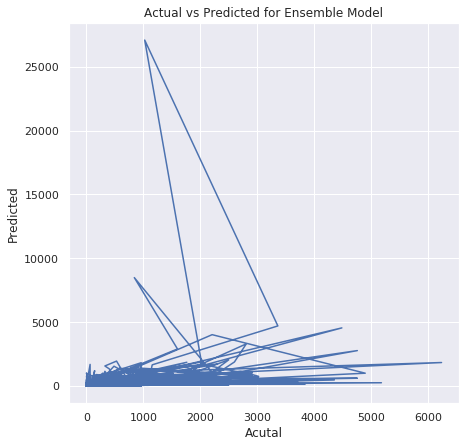

In [45]:
m3_predict=y_predict*y1_predict
df2 = pd.DataFrame(columns=['Acutal Y', 'Predicted Y'])
df2['Acutal Y']=y*y1
df2['Predicted Y']=m3_predict
df2['Error']=df2['Acutal Y']-df2['Predicted Y']
df2['Absolute Error']=df2['Error'].abs()
df2['Squared Error']=df2['Error']*df2['Error']
mse2=sklearn.metrics.mean_squared_error(df2['Acutal Y'],df2['Predicted Y'])
mae2=sklearn.metrics.mean_absolute_error(df2['Acutal Y'],df2['Predicted Y'])
rmse2 = math.sqrt(mse2)

m3={'Mean absolute error':mae2,'RMSE':rmse2}

print(m3)
df2
plt.plot(df2['Acutal Y'],df2['Predicted Y'])
plt.title("Actual vs Predicted for Ensemble Model")
plt.xlabel('Acutal')
plt.ylabel("Predicted")
plt.show()

